<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [0]:
df_housePrice = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [4]:
df_housePrice.head(7)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0


## Verificando o tamanho do dataset

In [0]:
df_housePrice.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
df_housePrice.describe().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000,1000.000,1000.000,1000.00,1000.000,1000.000,1000.000
mean,41985.600,124.326,2.009,3.00,2.034,0.331,0.485
std,12140.385,72.390,0.813,1.43,1.419,0.471,0.500
min,13150.000,1.000,1.000,1.00,0.000,0.000,0.000
25%,33112.500,60.750,1.000,2.00,1.000,0.000,0.000
50%,41725.000,123.000,2.000,3.00,2.000,0.000,0.000
75%,51175.000,187.000,3.000,4.00,3.000,1.000,1.000
max,73675.000,249.000,3.000,5.00,4.000,1.000,1.000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [8]:
df_housePrice.corr().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000,0.118,0.103,0.124,0.107,0.431,0.632
area,0.118,1.000,-0.008,-0.011,0.012,-0.015,-0.018
garagem,0.103,-0.008,1.000,0.067,0.060,-0.016,-0.021
banheiros,0.124,-0.011,0.067,1.000,0.048,-0.025,-0.018
lareira,0.107,0.012,0.060,0.048,1.000,0.030,-0.004
marmore,0.431,-0.015,-0.016,-0.025,0.030,1.000,-0.007
andares,0.632,-0.018,-0.021,-0.018,-0.004,-0.007,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Análises gráficas

<img width='700px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/Box-Plot.png'>

## Importando biblioteca seaborn

In [0]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [0]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

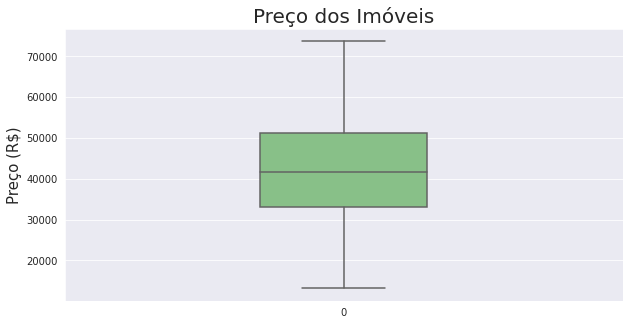

In [20]:
box_plot = sns.boxplot(data=df_housePrice['precos'], orient='v', width=0.3)
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Preço dos Imóveis', fontsize=20)
box_plot.set_ylabel('Preço (R$)', fontsize=15)
box_plot

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

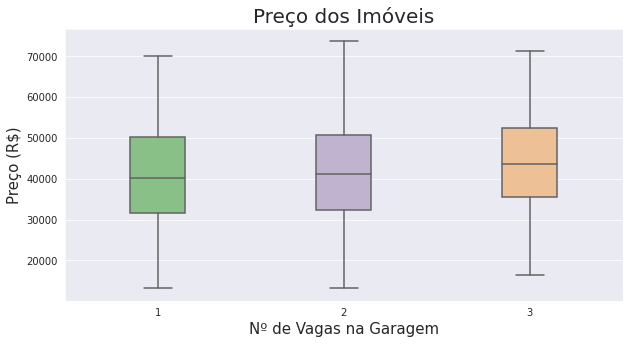

In [21]:
box_plot = sns.boxplot(y='precos', x='garagem', data=df_housePrice, orient='v', width=0.3)
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Preço dos Imóveis', fontsize=20)
box_plot.set_ylabel('Preço (R$)', fontsize=15)
box_plot.set_xlabel('Nº de Vagas na Garagem', fontsize=15)
box_plot

### Box-plot (Preço X Banheiros)

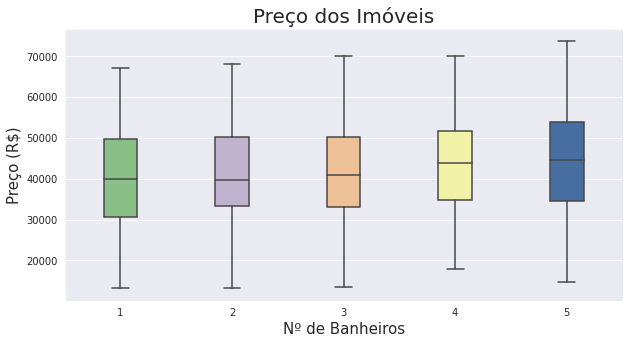

In [22]:
box_plot = sns.boxplot(y='precos', x='banheiros', data=df_housePrice, orient='v', width=0.3)
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Preço dos Imóveis', fontsize=20)
box_plot.set_ylabel('Preço (R$)', fontsize=15)
box_plot.set_xlabel('Nº de Banheiros', fontsize=15)
box_plot

### Box-plot (Preço X Lareira)

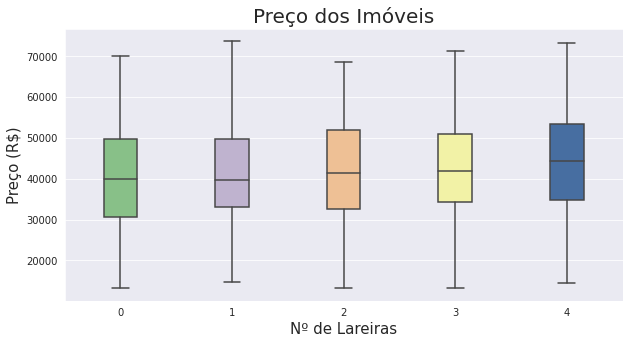

In [23]:
box_plot = sns.boxplot(y='precos', x='lareira', data=df_housePrice, orient='v', width=0.3)
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Preço dos Imóveis', fontsize=20)
box_plot.set_ylabel('Preço (R$)', fontsize=15)
box_plot.set_xlabel('Nº de Lareiras', fontsize=15)
box_plot

### Box-plot (Preço X Acabamento em Mármore)

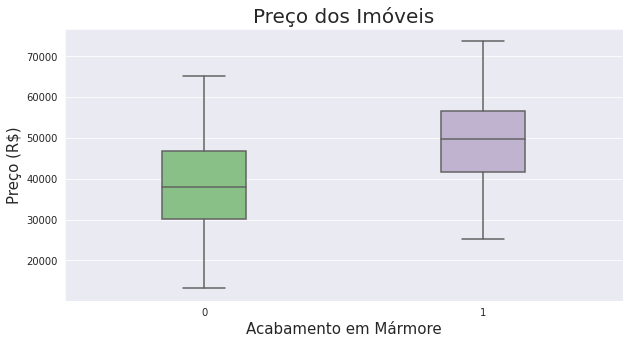

In [24]:
box_plot = sns.boxplot(y='precos', x='marmore', data=df_housePrice, orient='v', width=0.3)
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Preço dos Imóveis', fontsize=20)
box_plot.set_ylabel('Preço (R$)', fontsize=15)
box_plot.set_xlabel('Acabamento em Mármore', fontsize=15)
box_plot

### Box-plot (Preço X Andares)

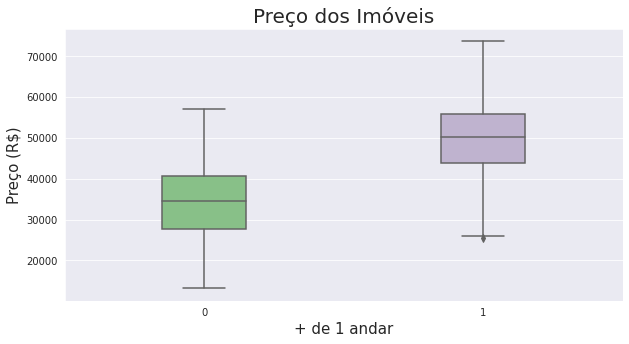

In [25]:
box_plot = sns.boxplot(y='precos', x='andares', data=df_housePrice, orient='v', width=0.3)
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Preço dos Imóveis', fontsize=20)
box_plot.set_ylabel('Preço (R$)', fontsize=15)
box_plot.set_xlabel('+ de 1 andar', fontsize=15)
box_plot

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

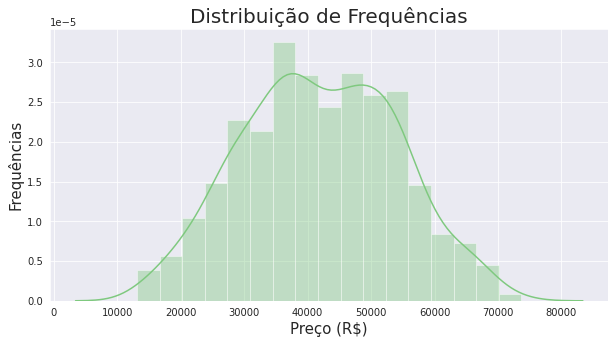

In [27]:
box_plot = sns.distplot(df_housePrice['precos'])
box_plot.figure.set_size_inches(10, 5)
box_plot.set_title('Distribuição de Frequências', fontsize=20)
box_plot.set_ylabel('Frequências', fontsize=15)
box_plot.set_xlabel('Preço (R$)', fontsize=15)
box_plot

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

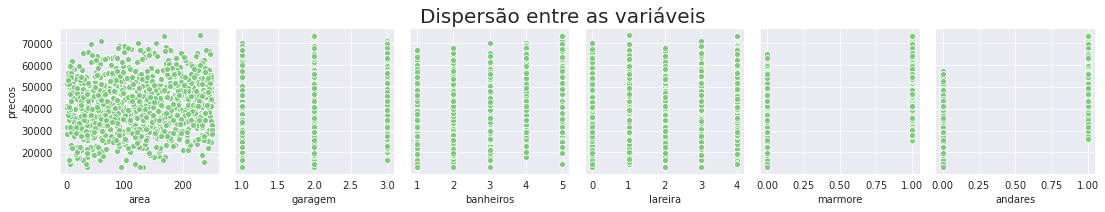

In [33]:
box_plot = sns.pairplot(df_housePrice, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
box_plot.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)
box_plot

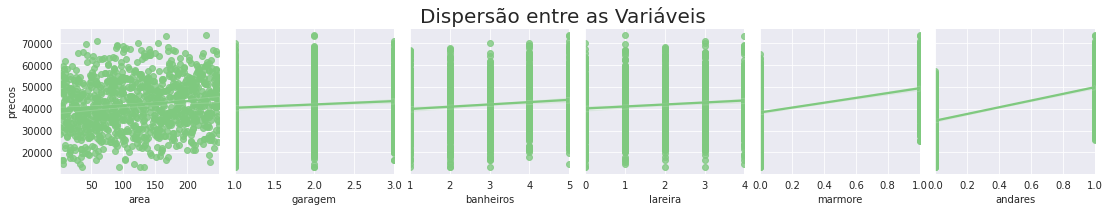

In [34]:
box_plot = sns.pairplot(df_housePrice, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
box_plot.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
box_plot

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [0]:
y = df_housePrice['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [0]:
x = df_housePrice[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando os datasets de treino e de teste

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [0]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [49]:
modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [50]:
print(f'R² = {modelo.score(x_train, y_train).round(3)}')

R² = 0.636


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [0]:
y_previsto = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [52]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [56]:
area=40
garagem=2
banheiros=3
lareira=0
marmore=0
andares=0

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print(f'R${modelo.predict(entrada)[0].round(3)}')

R$27650.067


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

In [59]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

df_metricas = pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns=['metricas'])
df_metricas

,metricas
EQM,50197019.50
REQM,7084.99
R2,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [0]:
import pickle

## Salvando o modelo estimado

In [0]:
output = open('meu_modelo', 'wb')
pickle.dump(modelo, output)
output.close()

In [64]:
modelo = open('meu_modelo','rb')
lm_new = pickle.load(modelo)
modelo.close()

area=40
garagem=2
banheiros=3
lareira=0
marmore=0
andares=0

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print(f'R${lm_new.predict(entrada)[0].round(3)}')

R$27650.067
